In [1]:
# Load EDA Packages
import pandas as pd
import numpy as np

# Load Viz Packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load Machine Learning Packages
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# For Metrics

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split







In [2]:
# Read Dataset
df=pd.read_csv("/content/drive/MyDrive/diabetes_data_upload.csv")
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
# Check for shape of Data Set

df.shape

(520, 17)

In [4]:
# Check for Columns
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [5]:
# Check for Missing Values

df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [6]:
# Converting and Cleaning up columns
df.columns.str.lower().str.replace(' ','_')

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [7]:
df.columns=df.columns.str.lower().str.replace(' ','_')


In [8]:
df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [9]:
# Encode the dataset
from sklearn.preprocessing import LabelEncoder

In [10]:
objList=df.select_dtypes(include ="object").columns

In [11]:
objList

Index(['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
       'polyphagia', 'genital_thrush', 'visual_blurring', 'itching',
       'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [12]:
# selecting all columns excluding  age,gender and class as they are of different charecteristics i.e All others are Yes or No while Gender and Class have different categories.
columns_to_label_encode=['polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
       'polyphagia', 'genital_thrush', 'visual_blurring', 'itching',
       'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity']

In [13]:
# instantiate Label Encoding
LE=LabelEncoder()

In [14]:
# Encode every column except age,gender and class

for col in columns_to_label_encode:
  df[col]=LE.fit_transform(df[col].astype(str))

In [15]:
df.dtypes

age                    int64
gender                object
polyuria               int64
polydipsia             int64
sudden_weight_loss     int64
weakness               int64
polyphagia             int64
genital_thrush         int64
visual_blurring        int64
itching                int64
irritability           int64
delayed_healing        int64
partial_paresis        int64
muscle_stiffness       int64
alopecia               int64
obesity                int64
class                 object
dtype: object

In [16]:
# List initial Classes
print(LE.classes_)

['No' 'Yes']


In [17]:
# Method 2 using custom function for encoding gender and class columns

#gender_map={'Female':0,'Male':1}
#target_label_map={'Negative':0,'Positive':1}



In [18]:
#df['gender'].unique()

#df['gender']=df['gender'].map(gender_map)

#df['class'].unique()

#df['class']=df['class'].map(target_label_map)





In [19]:
# Label Encoding for gender
df['gender']=LE.fit_transform(df['gender'])

In [20]:
# Label Encoding for class
df['class']=LE.fit_transform(df['class'])

In [21]:
# checking our data types after encoding
df.dtypes

age                   int64
gender                int64
polyuria              int64
polydipsia            int64
sudden_weight_loss    int64
weakness              int64
polyphagia            int64
genital_thrush        int64
visual_blurring       int64
itching               int64
irritability          int64
delayed_healing       int64
partial_paresis       int64
muscle_stiffness      int64
alopecia              int64
obesity               int64
class                 int64
dtype: object

In [22]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [23]:
# recheck info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 520 non-null    int64
 1   gender              520 non-null    int64
 2   polyuria            520 non-null    int64
 3   polydipsia          520 non-null    int64
 4   sudden_weight_loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   polyphagia          520 non-null    int64
 7   genital_thrush      520 non-null    int64
 8   visual_blurring     520 non-null    int64
 9   itching             520 non-null    int64
 10  irritability        520 non-null    int64
 11  delayed_healing     520 non-null    int64
 12  partial_paresis     520 non-null    int64
 13  muscle_stiffness    520 non-null    int64
 14  alopecia            520 non-null    int64
 15  obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

In [24]:
# value count per class
df['class'].value_counts()

1    320
0    200
Name: class, dtype: int64

In [25]:
# Plot of Distribution of data per class/label

px.bar(df,x="class")

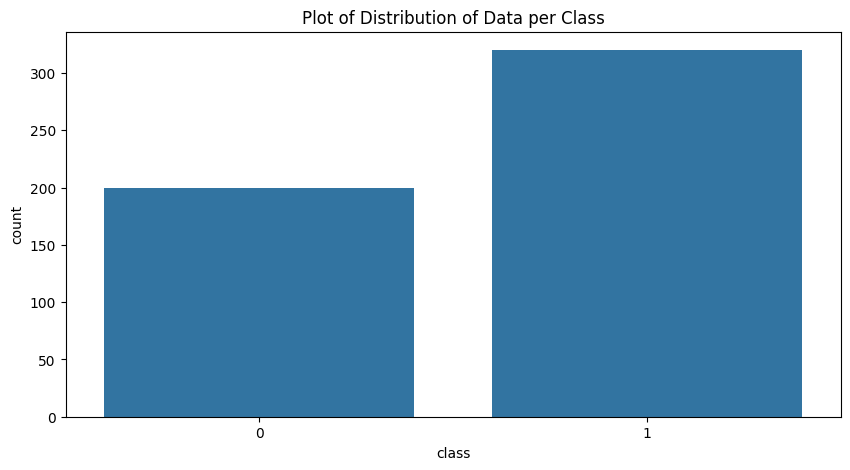

In [26]:
# Plot of Distribution of data per class/label
plt.figure(figsize=(10,5))
plt.title("Plot of Distribution of Data per Class")
sns.countplot(x='class',data=df)
plt.show()


In [27]:
# Feature Engineering and Selection

from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.ensemble import ExtraTreesClassifier

In [28]:
df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [29]:
x=df[['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity']]

y=df['class']

In [30]:
# Find the best features using SelectkBest
skb= SelectKBest(score_func=chi2,k=10)
best_feature_fit=skb.fit(x,y)

In [31]:
# Mapping to features name

feature_scores=pd.DataFrame(best_feature_fit.scores_,columns=['feature_score'])

In [32]:
feature_scores

,feature_score
0,18.845767
1,38.747637
2,116.184593
3,120.785515
4,57.749309
5,12.724262
6,33.198418
7,4.914009
8,18.124571
9,0.047826


In [33]:
# providing proper labeling for the feature scores
feature_column_name=pd.DataFrame(x.columns,columns=['feature_names'])
best_feat_df=pd.concat([feature_scores,feature_column_name],axis=1)

best_feat_df

,feature_score,feature_names
0,18.845767,age
1,38.747637,gender
2,116.184593,polyuria
3,120.785515,polydipsia
4,57.749309,sudden_weight_loss
5,12.724262,weakness
6,33.198418,polyphagia
7,4.914009,genital_thrush
8,18.124571,visual_blurring
9,0.047826,itching


In [34]:
best_feat_df.nlargest(10,"feature_score")

,feature_score,feature_names
3,120.785515,polydipsia
2,116.184593,polyuria
4,57.749309,sudden_weight_loss
12,55.314286,partial_paresis
1,38.747637,gender
10,35.334127,irritability
6,33.198418,polyphagia
14,24.402793,alopecia
0,18.845767,age
8,18.124571,visual_blurring


In [35]:
# ExtraTreeClassifier

et_clf=ExtraTreesClassifier()
et_clf.fit(x,y)

ExtraTreesClassifier()

In [36]:
print(et_clf.feature_importances_)

[0.05118858 0.10936895 0.23157871 0.18448372 0.05569674 0.01913746
 0.03026371 0.02482922 0.0311267  0.03699622 0.04293786 0.03633299
 0.054022   0.03000346 0.03967283 0.02236084]


In [37]:
# using column names as index to match the series of feature selection attributes
feature_importance_df=pd.Series(et_clf.feature_importances_,index=x.columns)
feature_importance_df

age                   0.051189
gender                0.109369
polyuria              0.231579
polydipsia            0.184484
sudden_weight_loss    0.055697
weakness              0.019137
polyphagia            0.030264
genital_thrush        0.024829
visual_blurring       0.031127
itching               0.036996
irritability          0.042938
delayed_healing       0.036333
partial_paresis       0.054022
muscle_stiffness      0.030003
alopecia              0.039673
obesity               0.022361
dtype: float64

<Axes: >

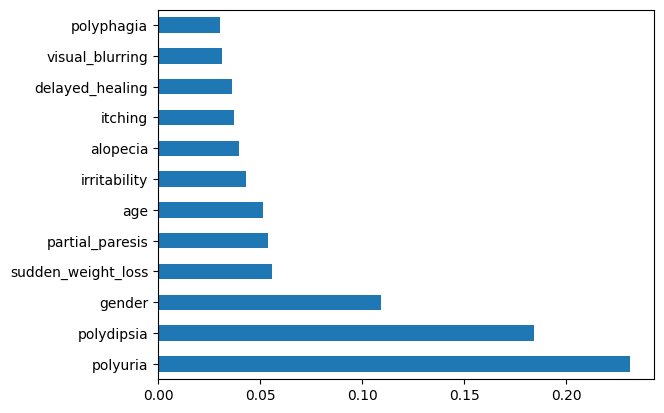

In [38]:
# Identifying Top 12 feature importance with a horizontal bar chart
feature_importance_df.nlargest(12).plot(kind='barh')

In [39]:
# Model Development

# Split Dataset into 2

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

In [40]:
#shape of data set

print("Original data ",df.shape)
print("train  data  ",x_train.shape)
print("Test data  ",x_test.shape)


Original data  (520, 17)
train  data   (364, 16)
Test data   (156, 16)


In [41]:
#Using logistic regression Estimator  to build model

lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [42]:
# Check model Accuracy

# Method 1

lr_model.score(x_test,y_test)

0.8910256410256411

In [43]:
# Check model prediction

y_pred=lr_model.predict(x_test)

y_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1])

In [44]:
# test with other classification models

In [62]:
# Create a list of features
#features = [35, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1]

# Make a prediction using the list of features
#z_pred = lr_model.predict([features])
#if z_pred==1:
#  print("Sorry!You have Diabetes")
#else:
#  print("Congratulations!You dont have Diabetes")






/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [ ]:
import joblib

In [ ]:
#Check for  Joblib Version
print('Joblib',joblib.__version__)

In [ ]:
# Save LR Model
model_file_dt=open("Logistic_regression_diabetes_14_03_2024.pkl","wb")
joblib.dump(lr_model,model_file_dt) # putting/writing  the logistic regression model into variable file,model_file_dt,with file name,Logistic_regression_diabetes_14_03_2024.pkl
model_file_dt.close()